In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import math

In [23]:
m = UNITS.meter
s = UNITS.second

g = 9.8 
init_z = State(y=100.0 , v=0.0 )
init_x = State(y=0.0 , v=500.0 )

t_end = 6 
dt = 0.01

system_z = System(init=init_z, g=g,t_0=0 ,t_end=t_end, dt=dt)
system_x = System(init=init_x, t_0=0,t_end=t_end, dt=dt)

,values
init,y 0.0 v 500.0 dtype: float64
t_0,0
t_end,6
dt,0.01


In [24]:
def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt
def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 
    return dydt, dvdt


In [25]:
Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)

In [26]:
def adams(state,system,slope_func,t):
    y,v=state
    dt=system.dt
    
    f0,d0=slope_func(state,t,system)
    f1,d1=slope_func(state,t+dt,system)
    y1=(y+0.5*dt*(f0+f1))
    v1=(v+0.5*dt*(d0+d1))
    return State(y=y1 , v=v1)

In [27]:
def run_simulation(system, adams,slope_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = adams(frame.row[t],system,slope_func,t)
    
    return frame

In [28]:
results = run_simulation(system_z, adams,slope_func_z)

,y,v
0.00,100.00000,0.000
0.01,100.00000,-0.098
0.02,99.99902,-0.196
0.03,99.99706,-0.294
0.04,99.99412,-0.392
...,...,...
5.96,-73.76380,-58.408
5.97,-74.34788,-58.506
5.98,-74.93294,-58.604
5.99,-75.51898,-58.702


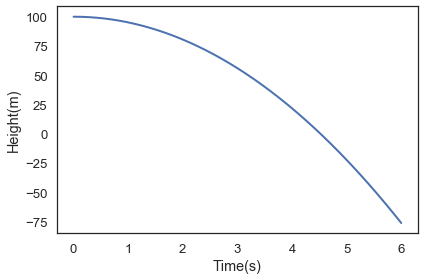

In [29]:
plot(results.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

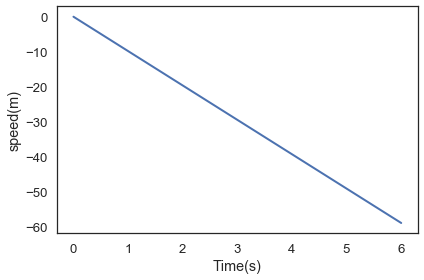

In [30]:
plot(results.v)
decorate(xlabel='Time(s)',
         ylabel='speed(m)')

In [31]:
resultsx = run_simulation(system_x, adams,slope_func_x)

,y,v
0.00,0.0,500.0
0.01,5.0,500.0
0.02,10.0,500.0
0.03,15.0,500.0
0.04,20.0,500.0
...,...,...
5.96,2980.0,500.0
5.97,2985.0,500.0
5.98,2990.0,500.0
5.99,2995.0,500.0


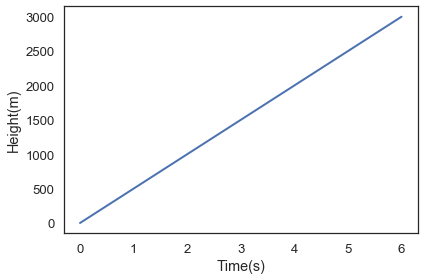

In [32]:
plot(resultsx.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')